In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
url='https://www.kaggle.com/competitions/playground-series-s3e20'
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nitinkumarchavan
Your Kaggle Key: ··········


100%|██████████| 48.9M/48.9M [00:00<00:00, 187MB/s]



Extracting archive ./playground-series-s3e20/playground-series-s3e20.zip to ./playground-series-s3e20


In [ ]:
train=pd.read_csv('/content/playground-series-s3e20/train.csv')
test=pd.read_csv('/content/playground-series-s3e20/test.csv')
submission=pd.read_csv('/content/playground-series-s3e20/sample_submission.csv')

In [ ]:
test=pd.read_csv('/content/playground-series-s3e20/test.csv')
test.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.561522,829937.000000,-100.113785,33.696957,-133.047562,33.779572,0.112175,2.374888,0.269846,227.193100,0.485340,-100.113785,33.696957,-133.047562,33.779572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.485129,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,15.600607,-140.529848,28.896124,0.000157,0.037641,1688.656342,2814.309683,829652.957598,26.072167,25.189549,-142.612636,28.318923,0.000048,1.117653e-05,0.000037,0.000093,7311.869141,-1.416309,0.036769,829736.125000,76.239196,15.600607,-140.529848,28.896124,0.000123,0.957096,0.000058,0.000000,28.896124,-140.529848,15.600607,76.239196,-0.823662,829753.051343,-0.009998,34.745542,-139.171039,30.405075,0.112643,2.537305,0.290184,228.489219,0.515679,-0.009998,34.745542,-139.171039,30.405075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.711262,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,39.889060,-136.908976,30.054682,0.000053,0.037795,2629.692089,3233.654973,829589.971617,14.881259,40.833582,-143.949340,26.760219,0.000055,1.679787e-05,0.000038,0.000109,8

In [ ]:
train = train.drop("ID_LAT_LON_YEAR_WEEK", axis=1)
test = test.drop("ID_LAT_LON_YEAR_WEEK", axis=1)

In [ ]:
print('The dimension of the train  dataset is:', train.shape)
print('The dimension of the test  dataset is:', test.shape)
print('The dimension of the  dataset is:', submission.shape)

The dimension of the train  dataset is: (79023, 75)
The dimension of the test  dataset is: (24353, 75)
The dimension of the  dataset is: (24353, 2)


In [ ]:
# Train statistical summary
train.describe(include = 'all')

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,76901.000000,76901.000000,76901.000000,76901.000000,76901.000000,76901.000000,76901.000000,76901.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,71746.000000,71746.000000,71746.000000,71746.000000,71746.000000,71746.000000,71746.000000,71746.000000,78484.000000,78484.000000,78484.000000,78484.000000,78484.000000,78484.000000,78475.000000,78475.000000,78475.000000,78475.000000,78475.000000,78475.000000,78475.000000,78475.000000,78475.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,-83.833174,27.722311,0.000015,0.033158,2113.906233,2821.590722,829938.633762,-7.331051,37.846794,-86.049580,27.767024,0.000044,0.000012,0.000032,0.000097,8922.568995,-1.812155,0.097008,829994.224471,-15.937696,36.852637,-84.260082,28.316388,0.000127,1.254134,0.000084,0.228801,27.887813,-84.605844,40.478057,-9.396089,-1.342787,829974.542096,-12.739997,39.962875,-86.548895,28.052553,0.117343,2.609890,0.310802,228.625917,0.569107,-13.1087

In [ ]:
train.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,-130.050797,35.874496,-0.000027,0.035370,1589.024536,4061.098145,829530.500000,71.111977,52.775928,-149.875565,25.965214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000117,0.863230,0.000038,0.255668,35.874496,-130.050797,50.843559,-98.593887,-1.280761,829864.546875,-12.628979,35.632416,-138.786446,30.752128,0.115927,2.506609,0.295663,225.731144,0.595473,-12.628979,35.632416,-138.786446,30.752128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.595473,53534.732422,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,-140.874435,28.965133,0.000012,0.036526,1772.574405,1869.040414,829787.287130,-1.019594,38.982368,-140.158048,29.562000,0.000047,1.639765e-05,0.00003,0.000093,7311.869141,-1.935386,0.067038,829859.960368,5.471037,35.265195,-138.343908,30.054262,0.000170,1.172826,0.000143,0.200754,29.071781,-141.814827,43.050213,4.678839,-1.548119,829747.856973,16.152492,43.485327,-142.786141,28.573627,0.116775,2.657704,0.315733,226.172170,0.175166,24.464335,42.596541,-143.097868,28.213655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.213608,63790.296241,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,-150.191757,23.206415,0.000154,0.035338,2703.236800,2809.138386,829883.828686,-

In [ ]:
missing_value_percentage = (train.isnull().sum() / len(train))*100
missing_value_percentage.sort_values(ascending=False)

UvAerosolLayerHeight_aerosol_height           99.444466
UvAerosolLayerHeight_sensor_azimuth_angle     99.444466
UvAerosolLayerHeight_aerosol_pressure         99.444466
UvAerosolLayerHeight_aerosol_optical_depth    99.444466
UvAerosolLayerHeight_sensor_zenith_angle      99.444466
                                                ...    
latitude                                       0.000000
longitude                                      0.000000
week_no                                        0.000000
year                                           0.000000
emission                                       0.000000
Length: 75, dtype: float64

In [ ]:
# Dropping those column having missing value percentage greater than 60%
columns_to_drop = missing_value_percentage[missing_value_percentage > 60].index
train = train.drop(columns=columns_to_drop)

In [ ]:
columns_to_mean=missing_value_percentage[ (missing_value_percentage <10) & (missing_value_percentage >0)].index
columns_mean = train[columns_to_mean].mean()
train[columns_to_mean] = train[columns_to_mean].fillna(columns_mean)

In [ ]:
columns_to_knn=missing_value_percentage[ (missing_value_percentage > 10) & (missing_value_percentage < 60) ].index
columns_to_knn

Index(['SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide_stratospheric_NO2_column_number_density',
       'NitrogenDioxide_NO2_slant_column_number_density',
       'NitrogenDioxide_tropopause_pressure',
       'NitrogenDioxide_absorbing_aerosol_index',
       'NitrogenDioxide_cloud_fraction', 'NitrogenDioxide_sensor_altitude',
       'NitrogenDioxide_sensor_azimuth_angle',
       'NitrogenDioxide_sensor_zenith_angle',
       'NitrogenDioxide_solar_azimuth_angle',
       'Nitrogen

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
Knn_impu = KNNImputer(n_neighbors=5)
train[columns_to_knn] = Knn_impu.fit_transform(train[columns_to_knn])

In [ ]:
pd.set_option("display.max_rows", None)
train.isnull().sum()

latitude                                                    0
longitude                                                   0
year                                                        0
week_no                                                     0
SulphurDioxide_SO2_column_number_density                    0
SulphurDioxide_SO2_column_number_density_amf                0
SulphurDioxide_SO2_slant_column_number_density              0
SulphurDioxide_cloud_fraction                               0
SulphurDioxide_sensor_azimuth_angle                         0
SulphurDioxide_sensor_zenith_angle                          0
SulphurDioxide_solar_azimuth_angle                          0
SulphurDioxide_solar_zenith_angle                           0
SulphurDioxide_SO2_column_number_density_15km               0
CarbonMonoxide_CO_column_number_density                     0
CarbonMonoxide_H2O_column_number_density                    0
CarbonMonoxide_cloud_height                                 0
CarbonMo

In [ ]:
train.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,-130.050797,35.874496,-0.000027,0.035370,1589.024536,4061.098145,829530.500000,71.111977,52.775928,-149.875565,25.965214,0.000050,2.053294e-05,0.000029,0.000107,7311.869141,-1.583541,0.121020,830103.044615,-98.615607,50.843605,-129.874453,35.843688,0.000117,0.863230,0.000038,0.255668,35.874496,-130.050797,50.843559,-98.593887,-1.280761,829864.546875,-12.628979,35.632416,-138.786446,30.752128,0.115927,2.506609,0.295663,225.731144,0.595473,-12.628979,35.632416,-138.786446,30.752128,0.595473,53534.732422,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,-140.874435,28.965133,0.000012,0.036526,1772.574405,1869.040414,829787.287130,-1.019594,38.982368,-140.158048,29.562000,0.000047,1.639765e-05,0.000030,0.000093,7311.869141,-1.935386,0.067038,829859.960368,5.471037,35.265195,-138.343908,30.054262,0.000170,1.172826,0.000143,0.200754,29.071781,-141.814827,43.050213,4.678839,-1.548119,829747.856973,16.152492,43.485327,-142.786141,28.573627,0.116775,2.657704,0.315733,226.172170,0.175166,24.464335,42.596541,-143.097868,28.213655,0.213608,63790.296241,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,-150.191757,23.206415,0.000154,0.035338,2703.236800,2809.138386,829883.828686,-54.801144,52.344378,-133.683714,31.586838,0.000031,4.267369e-07,0.000030,0.000080,7311.869141,-2.754374,0.072135,829527.125000,72.795837,52.868816,-150.191757,23.206415,0.000080,1.175467,0.000019,0.279449,30.994290,-135.667160,52.810561,-41.363579,-1.03867

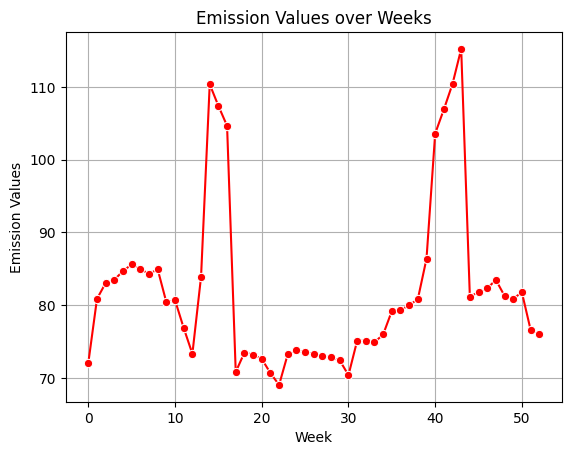

In [ ]:
x = train['week_no']
y = train['emission']

sns.lineplot(x=x, y=y, marker='o', color='red', ci=None)
plt.title('Emission Values over Weeks')
plt.xlabel('Week')
plt.ylabel('Emission Values')
plt.grid(True)
plt.show()

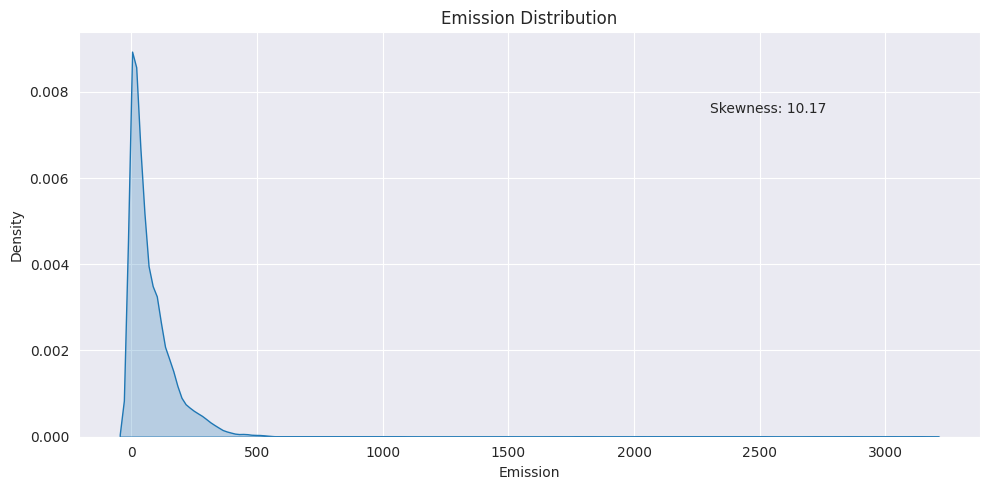

In [ ]:
plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')

sns.kdeplot(data=train, x="emission", fill=True)
plt.title("Emission Distribution")
plt.xlabel("Emission")
original_skewness = train["emission"].skew()
plt.annotate(f"Skewness: {original_skewness:.2f}", xy=(0.7, 0.8), xycoords="axes fraction")

plt.tight_layout()
plt.show()


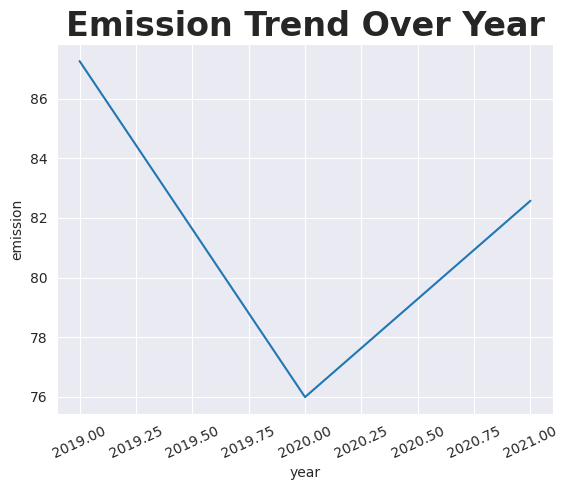

In [ ]:
sns.lineplot(data = train, x = 'year', y = 'emission', errorbar = None)
plt.title('Emission Trend Over Year', fontsize = 24, fontweight = 'bold')
plt.xticks(rotation = 25)
plt.show()

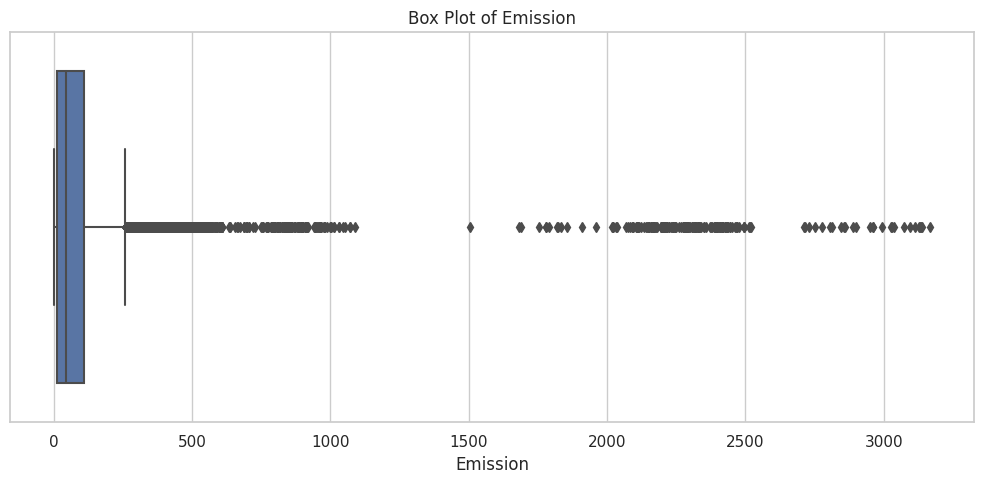

In [ ]:
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

sns.boxplot(x=train["emission"])
plt.title("Box Plot of Emission")
plt.xlabel("Emission")


plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
# Create a scatter mapbox plot
fig = px.scatter_mapbox(
    train,
    lat="latitude",
    lon="longitude",
    size="emission",
    color="emission",
    color_continuous_scale='Viridis',
    size_max=20,
    zoom=6
)

# Set mapbox style
fig.update_layout(mapbox_style="open-street-map")

# Update the layout
fig.update_layout(
    title="Emission Data Map Visualization",
    margin={"r": 0, "t": 30, "l": 0, "b": 0},
)

# Show the plot
fig.show()

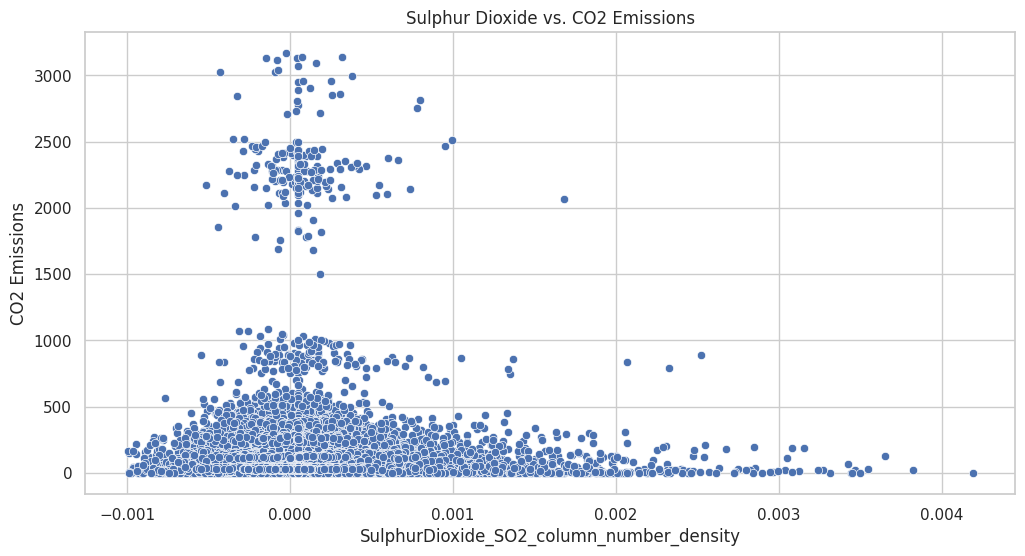

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='SulphurDioxide_SO2_column_number_density', y='emission', data=train)
plt.title('Sulphur Dioxide vs. CO2 Emissions')
plt.xlabel('SulphurDioxide_SO2_column_number_density')
plt.ylabel('CO2 Emissions')
plt.show()

In [ ]:
df_train =train[['latitude', 'longitude', 'year', 'week_no', 'emission']]
df_train.head()

,latitude,longitude,year,week_no,emission
0,-0.51,29.29,2019,0,3.750994
1,-0.51,29.29,2019,1,4.025176
2,-0.51,29.29,2019,2,4.231381
3,-0.51,29.29,2019,3,4.305286
4,-0.51,29.29,2019,4,4.347317


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
# Split the dataset into features (X) and target (y)
X = df_train.drop(columns=['emission'])
y = df_train['emission']

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
r2 = r2_score(y_test, linear_pred)
linear_rmse = linear_mse ** 0.5
print("Linear Regression RMSE:", linear_rmse)
print("R-squared:", r2)

Linear Regression RMSE: 127.15345655400628
R-squared: 0.017308874315767553


In [ ]:
# Decision Trees
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
r2 = r2_score(y_test, tree_pred)
tree_rmse = tree_mse ** 0.5
print("Decision Trees RMSE:", tree_rmse)
print("R-squared:", r2)

Decision Trees RMSE: 19.494946151067552
R-squared: 0.9769003833406077


In [ ]:
# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, rf_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = rf_mse ** 0.5
print("Random Forest RMSE:", rf_rmse)
print("R-squared:", r2)

Random Forest RMSE: 16.63743518959623
R-squared: 0.9831758378120663


In [ ]:
# Gradient Boosting Machines (GBM)
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)
gbm_pred = gbm_model.predict(X_test)
r2 = r2_score(y_test, gbm_pred)

gbm_mse = mean_squared_error(y_test, gbm_pred)
gbm_rmse = gbm_mse ** 0.5
print("GBM RMSE:", gbm_rmse)
print("R-squared:", r2)

GBM RMSE: 62.3238937756625
R-squared: 0.7639142085617876


In [ ]:
# XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)

xgb_rmse = xgb_mse ** 0.5
print("XGBoost RMSE:", xgb_rmse)
print("R-squared:", r2)

XGBoost RMSE: 21.560000030828387
R-squared: 0.9717474138927413


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds
num_folds = 5

# Create a k-fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define the model you want to use (e.g., RandomForestRegressor)
model = RandomForestRegressor()

# Perform cross-validation
cross_val_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)

# Calculate RMSE from the negative mean squared error
rmse_scores = (-cross_val_scores) ** 0.5

# Print RMSE scores for each fold
print("RMSE Scores for Each Fold:", rmse_scores)

# Print mean RMSE score and its standard deviation
print("Mean RMSE:", rmse_scores.mean())
print("Standard Deviation of RMSE:", rmse_scores.std())


RMSE Scores for Each Fold: [16.44828341 13.07670309 25.45246854 12.69459062 11.0248252 ]
Mean RMSE: 15.739374173481995
Standard Deviation of RMSE: 5.16593168127824


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameters you want to tune and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf)

# Perform grid search
grid_search.fit(X, y)

# Get the best hyperparameters and corresponding RMSE score
best_params = grid_search.best_params_
best_rmse = (-grid_search.best_score_) ** 0.5

print("Best Hyperparameters:", best_params)
print("Best RMSE:", best_rmse)


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE: 16.09936415271937


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create the RandomForestRegressor model with the best hyperparameters
best_max_depth = None  # Replace with the best value from the results
best_min_samples_split = 2  # Replace with the best value from the results
best_n_estimators = 100  # Replace with the best value from the results

final_model = RandomForestRegressor(
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    n_estimators=best_n_estimators,
    random_state=42
)

# Train the final model on the entire dataset
final_model.fit(X, y)

# Now the final_model is trained with the best hyperparameters


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

# Use the best hyperparameters obtained from hyperparameter tuning
best_max_depth = None
best_min_samples_split = 2
best_n_estimators = 100

# Create the final RandomForestRegressor model with the best hyperparameters
final_model = RandomForestRegressor(max_depth=best_max_depth, min_samples_split=best_min_samples_split, n_estimators=best_n_estimators, random_state=42)

# Train the final model on the entire training dataset
final_model.fit(X, y)

# Make predictions on the test dataset
final_predictions = final_model.predict(X_test)

# Calculate the mean squared error
final_mse = mean_squared_error(y_test, final_predictions)

# Calculate the root mean squared error
final_rmse = final_mse ** 0.5

print("Final RMSE on Test Data:", final_rmse)


Final RMSE on Test Data: 6.070589778481094


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have trained individual models: linear_model, rf_model, xgb_model

# Make predictions using each individual model
linear_pred = linear_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Create a VotingRegressor ensemble
ensemble = VotingRegressor(estimators=[
    ('linear', linear_model),
    ('rf', rf_model),
    ('xgb', xgb_model)
])

# Train the ensemble on the same training data
ensemble.fit(X_train, y_train)

# Make predictions using the ensemble
ensemble_pred = ensemble.predict(X_test)

# Calculate RMSE for individual models
linear_rmse = mean_squared_error(y_test, linear_pred, squared=False)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)

# Calculate RMSE for the ensemble
ensemble_rmse = mean_squared_error(y_test, ensemble_pred, squared=False)

print("Linear Regression RMSE:", linear_rmse)
print("Random Forest RMSE:", rf_rmse)
print("XGBoost RMSE:", xgb_rmse)
print("Ensemble RMSE:", ensemble_rmse)


Linear Regression RMSE: 127.15345655400628
Random Forest RMSE: 16.63743518959623
XGBoost RMSE: 21.560000030828387
Ensemble RMSE: 47.32187054918129


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Assuming you've already split the data and prepared X_train, X_test, y_train, y_test

# Train the Random Forest model with optimized hyperparameters
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=1)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_pred = rf_model.predict(X_test)

# Calculate RMSE for the Random Forest model
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
print("Random Forest RMSE:", rf_rmse)

# Save the trained model to a file
model_filename = "random_forest_model.pkl"
joblib.dump(rf_model, model_filename)


Random Forest RMSE: 17.337542352796916


['random_forest_model.pkl']

In [ ]:
# Load the saved model
loaded_model = joblib.load(model_filename)

# Make predictions using the loaded model
new_predictions = loaded_model.predict(X_test)
new_predictions

array([114.42735908,  11.4410469 , 268.89053311, ...,  28.77883401,
        48.55380115,   0.        ])

In [ ]:
# converting all RSME error values of different machine learning model into a DataFrame

Errors = [linear_rmse,tree_rmse,rf_rmse,svm_rmse,xgb_rmse,gbm_rmse]
dataPerf = pd.DataFrame(data={'Model': ['LinearRegression', 'Decision Trees', 'Random Forest', 'Support Vector Machines (SVM)', 'XGBoost', 'Gradient Boosting Machines (GBM)' ], 'Error': Errors})
Erro_desc = dataPerf.sort_values(by='Error', ascending=True).reset_index(drop=True)
print(Erro_desc)

                              Model       Error
0                     Random Forest   16.637435
1                    Decision Trees   19.494946
2                           XGBoost   21.560000
3  Gradient Boosting Machines (GBM)   62.323894
4     Support Vector Machines (SVM)  124.877382
5                  LinearRegression  127.153457


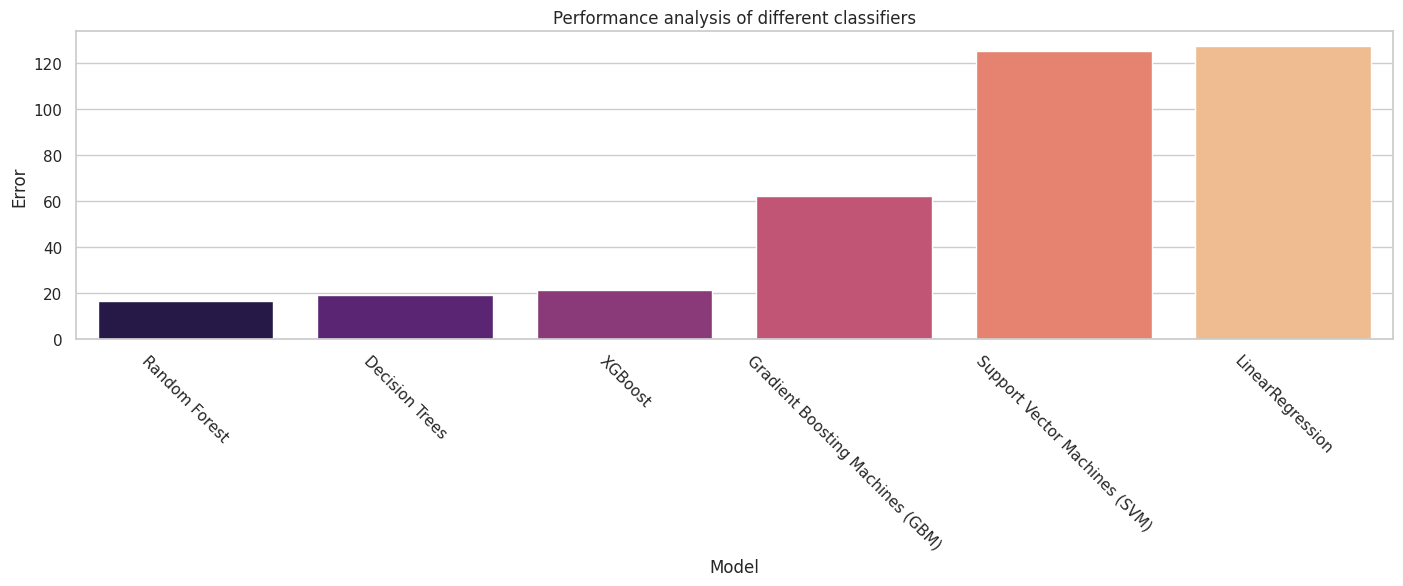

In [ ]:
plt.figure(figsize=(17,4))
sns.barplot(x="Model", y="Error", data=Erro_desc, palette="magma")
plt.title('Performance analysis of different classifiers')
plt.xticks(rotation=-45)
plt.show()

In [ ]:
test.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.561522,829937.000000,-100.113785,33.696957,-133.047562,33.779572,0.112175,2.374888,0.269846,227.193100,0.485340,-100.113785,33.696957,-133.047562,33.779572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.485129,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,15.600607,-140.529848,28.896124,0.000157,0.037641,1688.656342,2814.309683,829652.957598,26.072167,25.189549,-142.612636,28.318923,0.000048,1.117653e-05,0.000037,0.000093,7311.869141,-1.416309,0.036769,829736.125000,76.239196,15.600607,-140.529848,28.896124,0.000123,0.957096,0.000058,0.000000,28.896124,-140.529848,15.600607,76.239196,-0.823662,829753.051343,-0.009998,34.745542,-139.171039,30.405075,0.112643,2.537305,0.290184,228.489219,0.515679,-0.009998,34.745542,-139.171039,30.405075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.711262,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,39.889060,-136.908976,30.054682,0.000053,0.037795,2629.692089,3233.654973,829589.971617,14.881259,40.833582,-143.949340,26.760219,0.000055,1.679787e-05,0.000038,0.000109,8

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24353 entries, 0 to 24352
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      24353 non-null  object 
 1   latitude                                                  24353 non-null  float64
 2   longitude                                                 24353 non-null  float64
 3   year                                                      24353 non-null  int64  
 4   week_no                                                   24353 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  18211 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              18211 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            18211 non-null  float64
 8   SulphurDioxide_c

In [ ]:
test_missing_value_percentage = (test.isnull().sum() / len(test))*100
test_missing_value_percentage.sort_values(ascending=False)

UvAerosolLayerHeight_aerosol_pressure                       91.405576
UvAerosolLayerHeight_aerosol_optical_depth                  91.405576
UvAerosolLayerHeight_sensor_zenith_angle                    91.405576
UvAerosolLayerHeight_sensor_azimuth_angle                   91.405576
UvAerosolLayerHeight_aerosol_height                         91.405576
UvAerosolLayerHeight_solar_zenith_angle                     91.405576
UvAerosolLayerHeight_solar_azimuth_angle                    91.405576
SulphurDioxide_sensor_zenith_angle                          25.220712
SulphurDioxide_SO2_column_number_density_15km               25.220712
SulphurDioxide_solar_azimuth_angle                          25.220712
SulphurDioxide_solar_zenith_angle                           25.220712
SulphurDioxide_sensor_azimuth_angle                         25.220712
SulphurDioxide_cloud_fraction                               25.220712
SulphurDioxide_SO2_slant_column_number_density              25.220712
SulphurDioxide_SO2_c

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
test_columns_to_knn=test_missing_value_percentage[ (test_missing_value_percentage > 10) & (test_missing_value_percentage < 60) ].index
test_columns_to_knn

Index(['SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide_stratospheric_NO2_column_number_density',
       'NitrogenDioxide_NO2_slant_column_number_density',
       'NitrogenDioxide_tropopause_pressure',
       'NitrogenDioxide_absorbing_aerosol_index',
       'NitrogenDioxide_cloud_fraction', 'NitrogenDioxide_sensor_altitude',
       'NitrogenDioxide_sensor_azimuth_angle',
       'NitrogenDioxide_sensor_zenith_angle',
       'NitrogenDioxide_solar_azimuth_angle',
       'Nitrogen

In [ ]:
Knn_imputer = KNNImputer(n_neighbors=5)
test[test_columns_to_knn] = Knn_imputer.fit_transform(test[test_columns_to_knn])

In [ ]:
# Dropping those column having missing value percentage greater than 60%
test_columns_to_drop = test_missing_value_percentage[test_missing_value_percentage > 60].index
test = test.drop(columns=test_columns_to_drop)

In [ ]:
test_columns_to_mean = test_missing_value_percentage[(test_missing_value_percentage < 10) & (test_missing_value_percentage > 0)].index
test_columns_mean = test[test_columns_to_mean].mean()
test[test_columns_to_mean] = test[test_columns_to_mean].fillna(test_columns_mean)

In [ ]:
test.isnull().sum()

ID_LAT_LON_YEAR_WEEK                                        0
latitude                                                    0
longitude                                                   0
year                                                        0
week_no                                                     0
SulphurDioxide_SO2_column_number_density                    0
SulphurDioxide_SO2_column_number_density_amf                0
SulphurDioxide_SO2_slant_column_number_density              0
SulphurDioxide_cloud_fraction                               0
SulphurDioxide_sensor_azimuth_angle                         0
SulphurDioxide_sensor_zenith_angle                          0
SulphurDioxide_solar_azimuth_angle                          0
SulphurDioxide_solar_zenith_angle                           0
SulphurDioxide_SO2_column_number_density_15km               0
CarbonMonoxide_CO_column_number_density                     0
CarbonMonoxide_H2O_column_number_density                    0
CarbonMo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df_test = test[['latitude', 'longitude', 'year', 'week_no']]

In [ ]:
#Scaling
df_test = scaler.fit_transform(df_test)

In [ ]:
#Predict
y_pred = final_model.predict(df_test)

In [ ]:
output = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': test.ID_LAT_LON_YEAR_WEEK, 'emission': y_pred})
output.to_csv('submission88.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
